In [1]:
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Run in anaconda prompt first:
# conda install -c conda-forge librosa
import librosa
import librosa.display

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import models

from math import log2, pow
import IPython.display as ipd

In [2]:
def to_log_melspectogram(audio_array):
    S = librosa.feature.melspectrogram(audio_array, sr=16000, n_fft=2048, hop_length=512)
    # decibels are the log scale of amplitudes
    return librosa.power_to_db(S, ref=np.max)

def format_audio(audio_series):
    model_input = np.asarray([to_log_melspectogram(audio_series)])
    librosa.display.specshow(model_input[0], sr=16000, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB');
    return model_input[:, :, :, newaxis]

def midi_pitch_to_frequency(d):
    return (2**((d-69)/12.0))*440.0

def frequency_to_note(freq):
    name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    C0 = 440*pow(2, -4.75)
    h = round(12*log2(freq/C0))
    octave = h // 12
    n = h % 12
    return name[n] + str(octave)

def midi_pitch_to_note(d):
    return frequency_to_note(midi_pitch_to_frequency(d))

# Demo Explanation

This is a demonstration of our fitted convolutional neural network using audio samples NOT from our training/validation/testing dataset.

 Here I show two clips of a piano playing the note G5. One clip has reverb and is generally noisier than the other. Despite this, our model can correctly determine that they are the same note.

In [3]:
model = keras.models.load_model('nsynth_cnn_classifier.h5', compile=True)

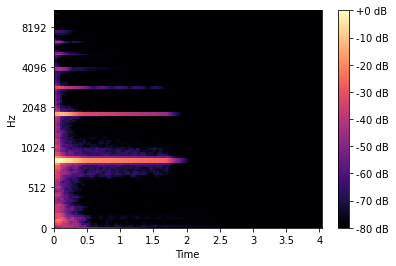

In [4]:
# from https://www.youtube.com/watch?v=uZ_EBr00VdU
g5_piano, _ = librosa.load('g5_piano.wav', sr=16000, mono=True, duration=4)
demo_input1 = format_audio(g5_piano)
ipd.Audio('g5_piano.wav')

In [5]:
output1 = np.argmax(model.predict(demo_input1))
print("Note: ", midi_pitch_to_note(output1))

Note:  G5


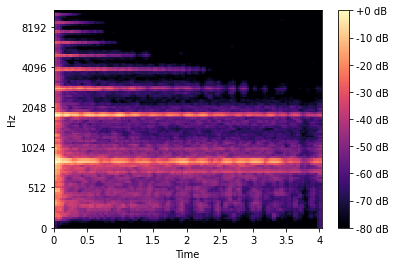

In [6]:
# from https://freesound.org/people/TEDAgame/sounds/448553/
g5_piano_with_reverb, _ = librosa.load('g5_piano_reverb.wav', sr=16000, mono=True, duration=4)
demo_input2 = format_audio(g5_piano_with_reverb)
ipd.Audio('g5_piano_reverb.wav')

In [7]:
# from https://freesound.org/people/Tesabob2001/sounds/203495/
output2 = np.argmax(model.predict(demo_input2))
print("Note: ", midi_pitch_to_note(output2))

Note:  G5


# Interesting Behavior with violin

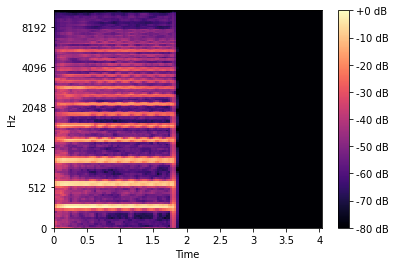

In [10]:
# from https://freesound.org/people/hammondman/sounds/333731/
c3_violin, _ = librosa.load('c3_violin.wav', sr=16000, mono=True, duration=4)
demo_input3 = format_audio(c3_violin)
ipd.Audio('c3_violin.wav')

In [11]:
output3 = np.argmax(model.predict(demo_input3))
print("Note: ", midi_pitch_to_note(output3))
# Note: This is the correct pitch class, but one octave too high. 

Note:  C4


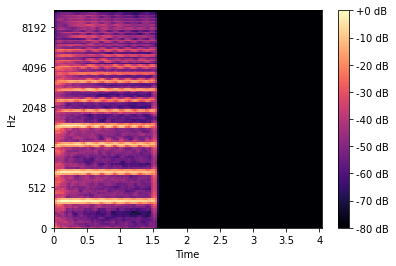

In [12]:
# from https://freesound.org/people/hammondman/sounds/333740/
e3_violin, _ = librosa.load('e3_violin.wav', sr=16000, mono=True, duration=4)
demo_input4 = format_audio(e3_violin)
ipd.Audio('e3_violin.wav')

In [13]:
output4 = np.argmax(model.predict(demo_input4))
print("Note: ", midi_pitch_to_note(output4))
# Note: This is the correct pitch class, but one octave too high. 

Note:  E4


In [ ]:
# from https://freesound.org/people/Samulis/sounds/374143/
as4_trumpet, _ = librosa.load('a#4_trumpet.wav', sr=16000, mono=True, duration=4)
demo_input5 = format_audio(as4_trumpet)
ipd.Audio('a#4_trumpet.wav')

In [ ]:
output5 = np.argmax(model.predict(demo_input5))
print("Note: ", midi_pitch_to_note(output5))

In [ ]:

as4_trumpet, _ = librosa.load('a#4_trumpet.wav', sr=16000, mono=True, duration=4)
demo_input5 = format_audio(as4_trumpet)
ipd.Audio('a#4_trumpet.wav')